Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2697 - accuracy: 0.1644 - val_loss: 2.0074 - val_accuracy: 0.3211
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4000 - accuracy: 0.4931 - val_loss: 0.7968 - val_accuracy: 0.7303
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7713 - accuracy: 0.7480 - val_loss: 0.5774 - val_accuracy: 0.8295
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5609 - accuracy: 0.8337 - val_loss: 0.3748 - val_accuracy: 0.8927
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4501 - accuracy: 0.8698 - val_loss: 0.3422 - val_accuracy: 0.9029
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3920 - accuracy: 0.8868 - val_loss: 0.2823 - val_accuracy: 0.9193
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3505 - accuracy: 0.8991 - val_loss: 0.2712 - val_accuracy:

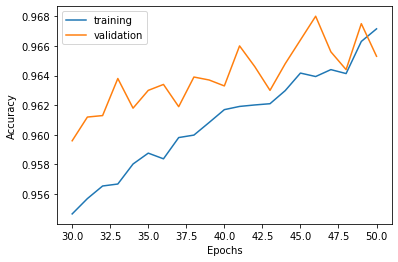

In [2]:
SX=128
SY=128
N=70000
epochs=50
depth=6
resolution=2**8
dataname='mnist_diff_expand_128_0.2_0.1_sim.dat'
modelsavename='mnist_diff_expand_128_0.2_0.1_epochs50.h5'
e1=epochs-20
e2=epochs+1
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)

import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
#print(x.shape)
#print(type(x))

import tensorflow as tf
#print(tf.__version__)

import keras as ks
#print(ks.__version__)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils

from sklearn.datasets import fetch_openml
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
mnist=fetch_openml('mnist_784')

y=mnist['target']
y=y.to_numpy()
#print(y.shape)
#print(type(y))


x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
y_test_backup=y_test

#print(x_train.shape)
#print(x_test.shape)

#print(x_train.shape[0])
#print(x_test.shape[0])

#x_train=x_train.reshape(x_train.shape[0],28)
#x_test=x_test.reshape(x_test.shape[0],28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=(resolution-1)
x_test/=(resolution-1)

#print(x_train.shape)
#print(x_test.shape)

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(0.1))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test))

#学習過程可視化
#print(type(result.history))
#print(type(result.history['accuracy']))
#print(result.history)
#print(result.history['accuracy'])

train_process=[]
train_process_val=[]
for i in range(e1-1,e2-1):
    train_process.append(result.history['accuracy'][i])
    train_process_val.append(result.history['val_accuracy'][i])

#print(train_process)
#print(train_process_val)


plt.plot(range(e1, e2), train_process, label="training")
plt.plot(range(e1, e2), train_process_val, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)



#保存
model.save(modelsavename)

plt.legend()
plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2166 - accuracy: 0.1812 - val_loss: 1.6185 - val_accuracy: 0.3853
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3137 - accuracy: 0.5401 - val_loss: 0.7640 - val_accuracy: 0.7608
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7065 - accuracy: 0.7771 - val_loss: 0.4179 - val_accuracy: 0.8805
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5082 - accuracy: 0.8485 - val_loss: 0.3583 - val_accuracy: 0.8939
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4171 - accuracy: 0.8772 - val_loss: 0.2943 - val_accuracy: 0.9135
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3647 - accuracy: 0.8938 - val_loss: 0.2816 - val_accuracy: 0.9197
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3283 - accuracy: 0.9056 - val_loss: 0.2601 - val_accuracy:

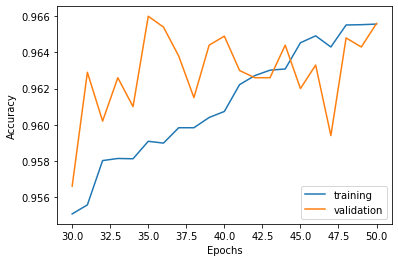

In [3]:
SX=128
SY=128
N=70000
epochs=50
depth=6
resolution=2**8
dataname='mnist_diff_nor_8bit_expand_128_0.2_0.1_sim.dat'
modelsavename='mnist_diff_nor_8bit_expand_128_0.2_0.1_epochs50.h5'
e1=epochs-20
e2=epochs+1
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)

import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
#print(x.shape)
#print(type(x))

import tensorflow as tf
#print(tf.__version__)

import keras as ks
#print(ks.__version__)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils

from sklearn.datasets import fetch_openml
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
mnist=fetch_openml('mnist_784')

y=mnist['target']
y=y.to_numpy()
#print(y.shape)
#print(type(y))


x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
y_test_backup=y_test

#print(x_train.shape)
#print(x_test.shape)

#print(x_train.shape[0])
#print(x_test.shape[0])

#x_train=x_train.reshape(x_train.shape[0],28)
#x_test=x_test.reshape(x_test.shape[0],28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=(resolution-1)
x_test/=(resolution-1)

#print(x_train.shape)
#print(x_test.shape)

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(0.1))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test))

#学習過程可視化
#print(type(result.history))
#print(type(result.history['accuracy']))
#print(result.history)
#print(result.history['accuracy'])

train_process=[]
train_process_val=[]
for i in range(e1-1,e2-1):
    train_process.append(result.history['accuracy'][i])
    train_process_val.append(result.history['val_accuracy'][i])

#print(train_process)
#print(train_process_val)


plt.plot(range(e1, e2), train_process, label="training")
plt.plot(range(e1, e2), train_process_val, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)



#保存
model.save(modelsavename)

plt.legend()
plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2695 - accuracy: 0.1446 - val_loss: 1.9981 - val_accuracy: 0.3718
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2912 - accuracy: 0.5390 - val_loss: 0.7055 - val_accuracy: 0.7458
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7331 - accuracy: 0.7550 - val_loss: 0.4955 - val_accuracy: 0.8476
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5291 - accuracy: 0.8367 - val_loss: 0.3563 - val_accuracy: 0.8948
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4308 - accuracy: 0.8714 - val_loss: 0.2926 - val_accuracy: 0.9160
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3728 - accuracy: 0.8902 - val_loss: 0.2720 - val_accuracy: 0.9212
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3335 - accuracy: 0.9024 - val_loss: 0.2416 - val_accuracy:

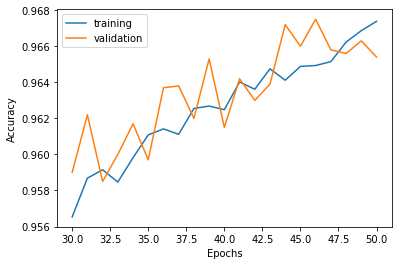

In [4]:
SX=128
SY=128
N=70000
epochs=50
depth=6
resolution=2**7
dataname='mnist_diff_nor_7bit_expand_128_0.2_0.1_sim.dat'
modelsavename='mnist_diff_nor_7bit_expand_128_0.2_0.1_epochs50.h5'
e1=epochs-20
e2=epochs+1
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)

import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
#print(x.shape)
#print(type(x))

import tensorflow as tf
#print(tf.__version__)

import keras as ks
#print(ks.__version__)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils

from sklearn.datasets import fetch_openml
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
mnist=fetch_openml('mnist_784')

y=mnist['target']
y=y.to_numpy()
#print(y.shape)
#print(type(y))


x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
y_test_backup=y_test

#print(x_train.shape)
#print(x_test.shape)

#print(x_train.shape[0])
#print(x_test.shape[0])

#x_train=x_train.reshape(x_train.shape[0],28)
#x_test=x_test.reshape(x_test.shape[0],28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=(resolution-1)
x_test/=(resolution-1)

#print(x_train.shape)
#print(x_test.shape)

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(0.1))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test))

#学習過程可視化
#print(type(result.history))
#print(type(result.history['accuracy']))
#print(result.history)
#print(result.history['accuracy'])

train_process=[]
train_process_val=[]
for i in range(e1-1,e2-1):
    train_process.append(result.history['accuracy'][i])
    train_process_val.append(result.history['val_accuracy'][i])

#print(train_process)
#print(train_process_val)


plt.plot(range(e1, e2), train_process, label="training")
plt.plot(range(e1, e2), train_process_val, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)



#保存
model.save(modelsavename)

plt.legend()
plt.show()


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2635 - accuracy: 0.1580 - val_loss: 1.9530 - val_accuracy: 0.3825
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3435 - accuracy: 0.5192 - val_loss: 0.7367 - val_accuracy: 0.7622
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7287 - accuracy: 0.7664 - val_loss: 0.4587 - val_accuracy: 0.8674
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5223 - accuracy: 0.8410 - val_loss: 0.3479 - val_accuracy: 0.8989
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4332 - accuracy: 0.8716 - val_loss: 0.3005 - val_accuracy: 0.9095
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3725 - accuracy: 0.8897 - val_loss: 0.2948 - val_accuracy: 0.9123
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.9002 - val_loss: 0.2397 - val_accuracy:

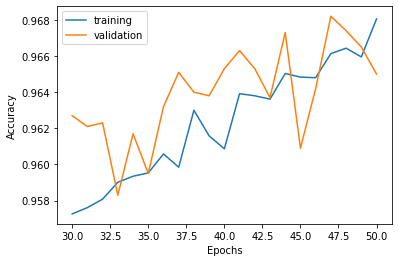

In [5]:
SX=128
SY=128
N=70000
epochs=50
depth=6
resolution=2**6
dataname='mnist_diff_nor_6bit_expand_128_0.2_0.1_sim.dat'
modelsavename='mnist_diff_nor_6bit_expand_128_0.2_0.1_epochs50.h5'
e1=epochs-20
e2=epochs+1
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)

import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
#print(x.shape)
#print(type(x))

import tensorflow as tf
#print(tf.__version__)

import keras as ks
#print(ks.__version__)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils

from sklearn.datasets import fetch_openml
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
mnist=fetch_openml('mnist_784')

y=mnist['target']
y=y.to_numpy()
#print(y.shape)
#print(type(y))


x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
y_test_backup=y_test

#print(x_train.shape)
#print(x_test.shape)

#print(x_train.shape[0])
#print(x_test.shape[0])

#x_train=x_train.reshape(x_train.shape[0],28)
#x_test=x_test.reshape(x_test.shape[0],28)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=(resolution-1)
x_test/=(resolution-1)

#print(x_train.shape)
#print(x_test.shape)

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(0.1))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test))

#学習過程可視化
#print(type(result.history))
#print(type(result.history['accuracy']))
#print(result.history)
#print(result.history['accuracy'])

train_process=[]
train_process_val=[]
for i in range(e1-1,e2-1):
    train_process.append(result.history['accuracy'][i])
    train_process_val.append(result.history['val_accuracy'][i])

#print(train_process)
#print(train_process_val)


plt.plot(range(e1, e2), train_process, label="training")
plt.plot(range(e1, e2), train_process_val, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)



#保存
model.save(modelsavename)

plt.legend()
plt.show()


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2831 - accuracy: 0.1260 - val_loss: 2.1625 - val_accuracy: 0.2176
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8676 - accuracy: 0.3078 - val_loss: 1.3483 - val_accuracy: 0.5053
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3025 - accuracy: 0.5266 - val_loss: 0.9980 - val_accuracy: 0.6505
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0599 - accuracy: 0.6313 - val_loss: 0.8561 - val_accuracy: 0.7126
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9309 - accuracy: 0.6896 - val_loss: 0.7813 - val_accuracy: 0.7464
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8362 - accuracy: 0.7283 - val_loss: 0.7017 - val_accuracy: 0.7698
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7678 - accuracy: 0.7545 - val_loss: 0.6007 - val_accuracy:

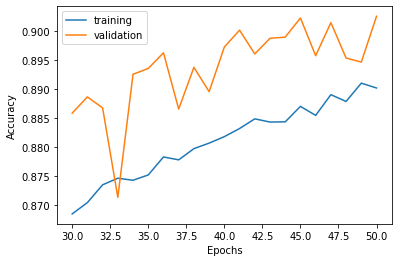

In [5]:
SX=128
SY=128
N=70000
epochs=50
depth=6
resolution=2**8
dataname=r"./simdat/mnist_diff_cy_0.05_0.05_0.05_sim.dat"
modelsavename=r"./h5model/mnist_diff_cy_0.05_0.05_0.05_epochs50.h5"
e1=epochs-20
e2=epochs+1


x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
import tensorflow as tf
import keras as ks
import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()

x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
y_test_backup=y_test
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=(resolution-1)
x_test/=(resolution-1)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(0.1))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test))

#学習過程可視化
train_process=[]
train_process_val=[]
for i in range(e1-1,e2-1):
    train_process.append(result.history['accuracy'][i])
    train_process_val.append(result.history['val_accuracy'][i])

plt.plot(range(e1, e2), train_process, label="training")
plt.plot(range(e1, e2), train_process_val, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.legend()
plt.show()


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6918 - accuracy: 0.7708 - val_loss: 0.3418 - val_accuracy: 0.8978
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8904 - val_loss: 0.2664 - val_accuracy: 0.9229
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3185 - accuracy: 0.9100 - val_loss: 0.2383 - val_accuracy: 0.9330
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.9184 - val_loss: 0.2037 - val_accuracy: 0.9410
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9265 - val_loss: 0.2071 - val_accuracy: 0.9392
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9292 - val_loss: 0.1763 - val_accuracy: 0.9491
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2372 - accuracy: 0.9327 - val_loss: 0.1993 - val_accuracy:

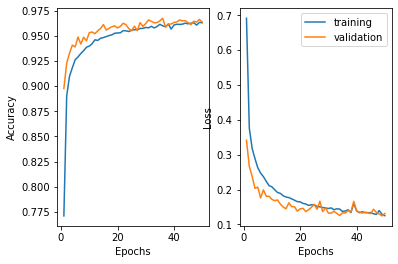

In [4]:
SX=128
SY=128
N=70000
epochs=50
depth=6
resolution=2**8
dataname=r"./simdat/mnist_diff_nor_8bit_expand_128_0.2_0.1_sim.dat"
modelsavename=r"./h5model/mnist_diff_expand_128_0.2_0.1_epochs50_adam.h5"
e1=1
e2=epochs+1


x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
import tensorflow as tf
import keras as ks
import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()

x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]
y_test_backup=y_test
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=(resolution-1)
x_test/=(resolution-1)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(0.1))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
from keras.optimizers import RMSprop,Adam
OPTIMIZER=Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.legend()
plt.show()

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2131 - accuracy: 0.1649 - val_loss: 1.7862 - val_accuracy: 0.3276
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4390 - accuracy: 0.4627 - val_loss: 1.0143 - val_accuracy: 0.6390
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8595 - accuracy: 0.7019 - val_loss: 0.6543 - val_accuracy: 0.8036
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5894 - accuracy: 0.8164 - val_loss: 0.4769 - val_accuracy: 0.8578
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4476 - accuracy: 0.8666 - val_loss: 0.3803 - val_accuracy: 0.8876
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8869 - val_loss: 0.3486 - val_accuracy: 0.8990
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.9021 - val_loss: 0.3198 - val_accuracy:

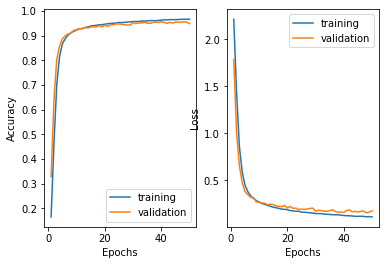

In [1]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_opj.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(DROPOUT))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3013 - accuracy: 0.1102 - val_loss: 2.2963 - val_accuracy: 0.1142
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2951 - accuracy: 0.1244 - val_loss: 2.2688 - val_accuracy: 0.1372
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0749 - accuracy: 0.2327 - val_loss: 1.5964 - val_accuracy: 0.4192
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4888 - accuracy: 0.4351 - val_loss: 1.1717 - val_accuracy: 0.5710
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1604 - accuracy: 0.5710 - val_loss: 0.9383 - val_accuracy: 0.6822
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9825 - accuracy: 0.6540 - val_loss: 0.8043 - val_accuracy: 0.7452
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8439 - accuracy: 0.7239 - val_loss: 0.7092 - val_accuracy:

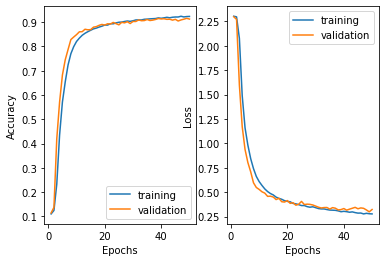

In [2]:
SX=256 #画像サイズ
SY=256 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_0.2_0.1_256_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_0.2_0.1_256_opj.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.25 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(DROPOUT))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1563 - accuracy: 0.2107 - val_loss: 1.7523 - val_accuracy: 0.3826
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2623 - accuracy: 0.5422 - val_loss: 1.0155 - val_accuracy: 0.6576
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8006 - accuracy: 0.7389 - val_loss: 0.6954 - val_accuracy: 0.7848
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6052 - accuracy: 0.8119 - val_loss: 0.5864 - val_accuracy: 0.8166
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5082 - accuracy: 0.8465 - val_loss: 0.5090 - val_accuracy: 0.8348
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4350 - accuracy: 0.8707 - val_loss: 0.4446 - val_accuracy: 0.8604
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3865 - accuracy: 0.8850 - val_loss: 0.4245 - val_accuracy:

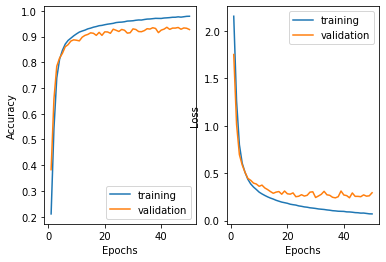

In [3]:
SX=256 #画像サイズ
SY=256 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_0.2_0.1_256_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_0.2_0.1_256_opj.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.25 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/80
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2990 - accuracy: 0.1142 - val_loss: 2.2952 - val_accuracy: 0.1142
Epoch 2/80
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2871 - accuracy: 0.1387 - val_loss: 2.2694 - val_accuracy: 0.1930
Epoch 3/80
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1850 - accuracy: 0.2191 - val_loss: 2.0308 - val_accuracy: 0.2856
Epoch 4/80
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9349 - accuracy: 0.3076 - val_loss: 1.7594 - val_accuracy: 0.3814
Epoch 5/80
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6706 - accuracy: 0.4125 - val_loss: 1.4794 - val_accuracy: 0.4882
Epoch 6/80
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4554 - accuracy: 0.4945 - val_loss: 1.2887 - val_accuracy: 0.5548
Epoch 7/80
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3191 - accuracy: 0.5444 - val_loss: 1.1981 - val_accuracy:

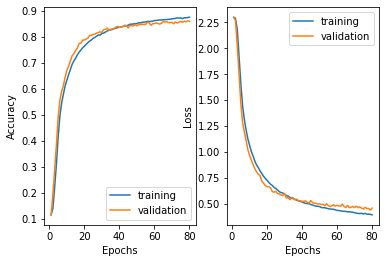

In [4]:
SX=256 #画像サイズ
SY=256
INX=16
INY=16
N=70000 #データ数
epochs=80 #エポック数

resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_0.2_0.1_256_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_0.2_0.1_256_CNN.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.25 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,INX,INY,1) #２次元化

x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#モデル
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(INX,INY,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(DROPOUT))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(128, activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2130 - accuracy: 0.1626 - val_loss: 1.7802 - val_accuracy: 0.3230
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3859 - accuracy: 0.5020 - val_loss: 0.8358 - val_accuracy: 0.7484
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7030 - accuracy: 0.7815 - val_loss: 0.5139 - val_accuracy: 0.8462
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4798 - accuracy: 0.8566 - val_loss: 0.4048 - val_accuracy: 0.8798
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3956 - accuracy: 0.8827 - val_loss: 0.3854 - val_accuracy: 0.8868
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3482 - accuracy: 0.8972 - val_loss: 0.3339 - val_accuracy: 0.8990
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.9083 - val_loss: 0.3060 - val_accuracy:

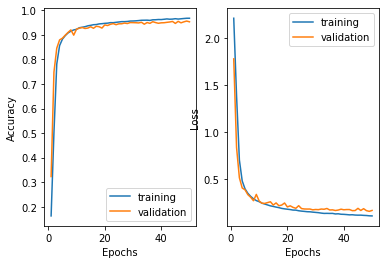

In [9]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_0.2_0.1_128_normali_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_0.2_0.1_128_normali_opj.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))
model.add(Dropout(DROPOUT))
for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1125 - accuracy: 0.2390 - val_loss: 1.4462 - val_accuracy: 0.5050
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0792 - accuracy: 0.6180 - val_loss: 0.8023 - val_accuracy: 0.7244
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6860 - accuracy: 0.7781 - val_loss: 0.5667 - val_accuracy: 0.8264
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5004 - accuracy: 0.8473 - val_loss: 0.4511 - val_accuracy: 0.8604
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4114 - accuracy: 0.8783 - val_loss: 0.3666 - val_accuracy: 0.8912
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3571 - accuracy: 0.8948 - val_loss: 0.3444 - val_accuracy: 0.9020
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.9064 - val_loss: 0.3039 - val_accuracy:

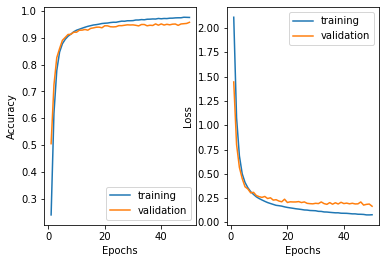

In [2]:
#OPJ提出用
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_0.2_0.1_128_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_0.2_0.1_128_opj_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2484 - accuracy: 0.1725 - val_loss: 2.0475 - val_accuracy: 0.2256
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5835 - accuracy: 0.4139 - val_loss: 1.1998 - val_accuracy: 0.5704
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9791 - accuracy: 0.6700 - val_loss: 0.8010 - val_accuracy: 0.7436
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6948 - accuracy: 0.7820 - val_loss: 0.7019 - val_accuracy: 0.7790
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5545 - accuracy: 0.8318 - val_loss: 0.5330 - val_accuracy: 0.8392
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4771 - accuracy: 0.8578 - val_loss: 0.4817 - val_accuracy: 0.8450
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4261 - accuracy: 0.8737 - val_loss: 0.4716 - val_accuracy:

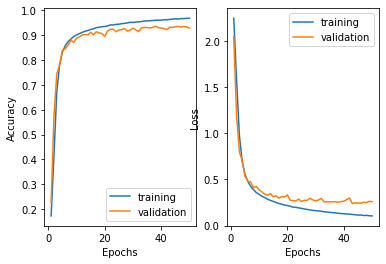

In [3]:
SX=256 #画像サイズ
SY=256 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_0.2_0.1_256_sim_opj.dat"  #simデータ
modelsavename=r"./h5model/opj/mnist_diff_0.2_0.1_256_opj_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1811 - accuracy: 0.1768 - val_loss: 1.7219 - val_accuracy: 0.3452
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0988 - accuracy: 0.6185 - val_loss: 0.6686 - val_accuracy: 0.7892
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5825 - accuracy: 0.8199 - val_loss: 0.4490 - val_accuracy: 0.8646
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4365 - accuracy: 0.8709 - val_loss: 0.4020 - val_accuracy: 0.8770
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3591 - accuracy: 0.8940 - val_loss: 0.3109 - val_accuracy: 0.9076
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3109 - accuracy: 0.9098 - val_loss: 0.2895 - val_accuracy: 0.9148
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.9190 - val_loss: 0.2757 - val_accuracy:

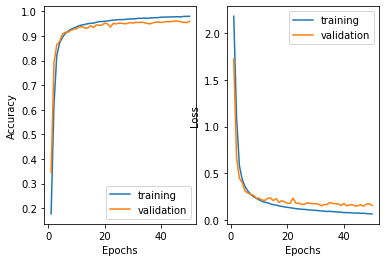

In [1]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.2_0.2_sim.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.2_0.2_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2761 - accuracy: 0.1743 - val_loss: 2.1300 - val_accuracy: 0.3074
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5778 - accuracy: 0.4366 - val_loss: 1.1960 - val_accuracy: 0.5740
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9968 - accuracy: 0.6679 - val_loss: 0.7833 - val_accuracy: 0.7472
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7317 - accuracy: 0.7684 - val_loss: 0.6662 - val_accuracy: 0.7792
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5925 - accuracy: 0.8174 - val_loss: 0.5473 - val_accuracy: 0.8230
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5175 - accuracy: 0.8406 - val_loss: 0.4820 - val_accuracy: 0.8460
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4641 - accuracy: 0.8578 - val_loss: 0.4774 - val_accuracy:

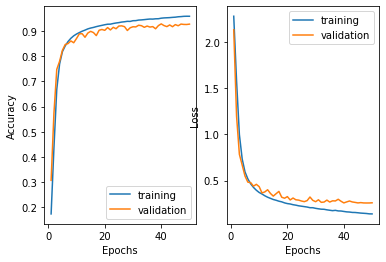

In [2]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.1_0.05_sim.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.1_0.05_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1105 - accuracy: 0.2575 - val_loss: 1.3344 - val_accuracy: 0.5244
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0360 - accuracy: 0.6342 - val_loss: 0.6931 - val_accuracy: 0.7826
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6162 - accuracy: 0.8104 - val_loss: 0.4837 - val_accuracy: 0.8576
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4570 - accuracy: 0.8640 - val_loss: 0.4376 - val_accuracy: 0.8678
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8885 - val_loss: 0.3339 - val_accuracy: 0.9000
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3353 - accuracy: 0.9035 - val_loss: 0.3382 - val_accuracy: 0.9004
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3052 - accuracy: 0.9123 - val_loss: 0.3087 - val_accuracy:

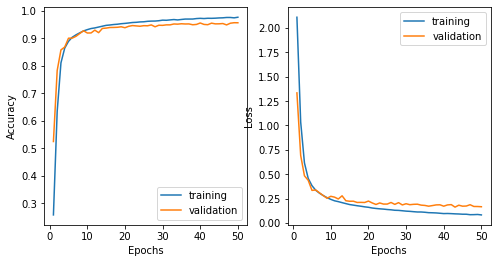

In [1]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.2_0.1_sim_rand_fix.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.2_0.1_sim_rand_fix_ver2_2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali,x_test=x[:60000],x[60000:65000],x[65000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali,y_test=y[:60000],y[60000:65000],y[65000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#テストデータで評価
loss_and_metrics=model.evaluate(x_test,y_test,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1856 - accuracy: 0.1765 - val_loss: 1.8053 - val_accuracy: 0.3485
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3344 - accuracy: 0.5232 - val_loss: 0.9127 - val_accuracy: 0.6940
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8706 - accuracy: 0.7155 - val_loss: 0.6298 - val_accuracy: 0.7998
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6549 - accuracy: 0.7962 - val_loss: 0.6207 - val_accuracy: 0.8087
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5199 - accuracy: 0.8427 - val_loss: 0.4047 - val_accuracy: 0.8790
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4448 - accuracy: 0.8679 - val_loss: 0.3493 - val_accuracy: 0.8970
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3945 - accuracy: 0.8825 - val_loss: 0.3133 - val_accuracy:

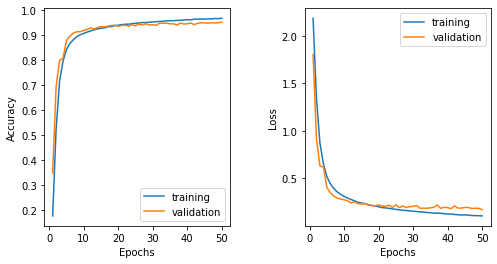

In [2]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.02_0.01_sim_rand_fix.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.02_0.01_sim_rand_fix_ver2_2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2224 - accuracy: 0.1923 - val_loss: 1.6654 - val_accuracy: 0.3728
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1900 - accuracy: 0.5809 - val_loss: 0.5916 - val_accuracy: 0.8283
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6222 - accuracy: 0.8072 - val_loss: 0.4061 - val_accuracy: 0.8809
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4668 - accuracy: 0.8600 - val_loss: 0.3420 - val_accuracy: 0.8962
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3898 - accuracy: 0.8862 - val_loss: 0.2789 - val_accuracy: 0.9167
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.9001 - val_loss: 0.2771 - val_accuracy: 0.9153
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9110 - val_loss: 0.2343 - val_accuracy:

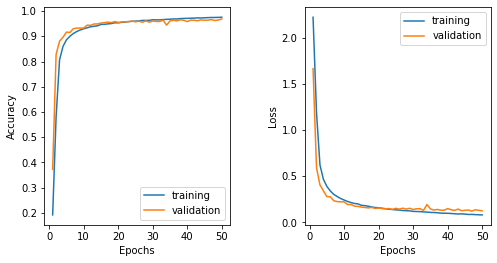

In [3]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.2_0.1_sim_rand_fix.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.2_0.1_sim_rand_fix_ver2_3.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2083 - accuracy: 0.1773 - val_loss: 1.6929 - val_accuracy: 0.3866
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3675 - accuracy: 0.4986 - val_loss: 0.8669 - val_accuracy: 0.7281
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7822 - accuracy: 0.7431 - val_loss: 0.5124 - val_accuracy: 0.8419
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5812 - accuracy: 0.8174 - val_loss: 0.4397 - val_accuracy: 0.8640
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4840 - accuracy: 0.8508 - val_loss: 0.3626 - val_accuracy: 0.8884
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4215 - accuracy: 0.8722 - val_loss: 0.3443 - val_accuracy: 0.8946
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8851 - val_loss: 0.3671 - val_accuracy:

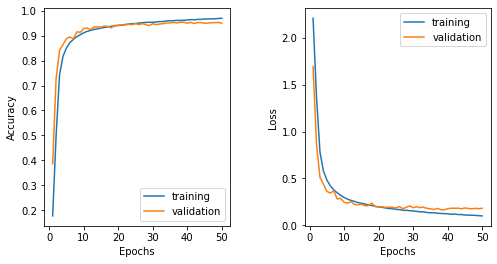

In [4]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.02_0.01_sim_rand_fix.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.02_0.01_sim_rand_fix_ver2_3.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2493 - accuracy: 0.1675 - val_loss: 1.8456 - val_accuracy: 0.3618
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3004 - accuracy: 0.5179 - val_loss: 0.7265 - val_accuracy: 0.7733
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7018 - accuracy: 0.7698 - val_loss: 0.4261 - val_accuracy: 0.8696
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4856 - accuracy: 0.8518 - val_loss: 0.3470 - val_accuracy: 0.8918
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8836 - val_loss: 0.3174 - val_accuracy: 0.9026
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3324 - accuracy: 0.9004 - val_loss: 0.2432 - val_accuracy: 0.9275
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2985 - accuracy: 0.9122 - val_loss: 0.2496 - val_accuracy:

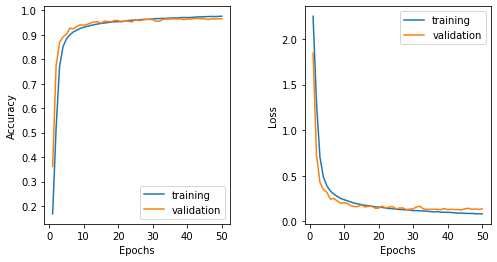

In [5]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_0.2_0.1_sim_rand_fix.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_0.2_0.1_sim_rand_fix_ver2_4.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#print(x_train.shape)
#print(x_vali.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_vali.shape)
#print(y_test.shape)
#y_test_backup=y_test

#x_train/=(resolution-1)
#x_test/=(resolution-1)
#y_train=np_utils.to_categorical(y_train,10)
#y_test=np_utils.to_categorical(y_test,10)

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2708 - accuracy: 0.1432 - val_loss: 2.0538 - val_accuracy: 0.2401
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7546 - accuracy: 0.3375 - val_loss: 1.3265 - val_accuracy: 0.5233
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1790 - accuracy: 0.5691 - val_loss: 0.8348 - val_accuracy: 0.7203
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8326 - accuracy: 0.7260 - val_loss: 0.5830 - val_accuracy: 0.8164
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6528 - accuracy: 0.7963 - val_loss: 0.4740 - val_accuracy: 0.8541
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5554 - accuracy: 0.8298 - val_loss: 0.4505 - val_accuracy: 0.8588
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4966 - accuracy: 0.8483 - val_loss: 0.3967 - val_accuracy:

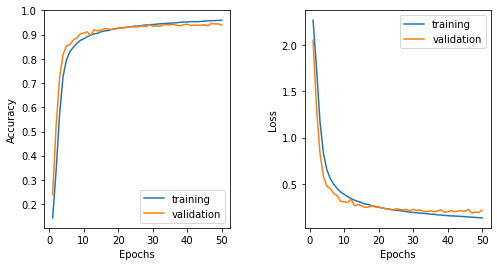

In [1]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.1_0.05.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.1_0.05_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2495 - accuracy: 0.1481 - val_loss: 1.9903 - val_accuracy: 0.2563
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6120 - accuracy: 0.3849 - val_loss: 1.3219 - val_accuracy: 0.4896
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1344 - accuracy: 0.5829 - val_loss: 0.8478 - val_accuracy: 0.7055
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8758 - accuracy: 0.6965 - val_loss: 0.6287 - val_accuracy: 0.7944
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7025 - accuracy: 0.7729 - val_loss: 0.5023 - val_accuracy: 0.8465
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5898 - accuracy: 0.8173 - val_loss: 0.4510 - val_accuracy: 0.8626
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5059 - accuracy: 0.8466 - val_loss: 0.3899 - val_accuracy:

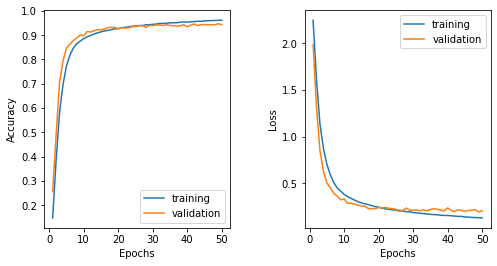

In [1]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.1_0.05.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.1_0.05_ver2_2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1872 - accuracy: 0.1874 - val_loss: 1.5548 - val_accuracy: 0.4043
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2382 - accuracy: 0.5384 - val_loss: 0.8426 - val_accuracy: 0.6925
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8603 - accuracy: 0.6980 - val_loss: 0.6063 - val_accuracy: 0.8011
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6711 - accuracy: 0.7831 - val_loss: 0.4855 - val_accuracy: 0.8482
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5545 - accuracy: 0.8270 - val_loss: 0.3988 - val_accuracy: 0.8741
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4823 - accuracy: 0.8514 - val_loss: 0.3815 - val_accuracy: 0.8782
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4385 - accuracy: 0.8655 - val_loss: 0.3721 - val_accuracy:

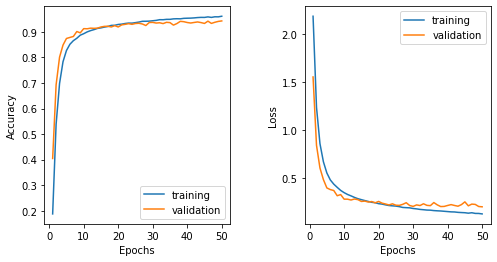

In [2]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.05_0.025.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.05_0.025_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2107 - accuracy: 0.1752 - val_loss: 1.8167 - val_accuracy: 0.2970
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4032 - accuracy: 0.4779 - val_loss: 0.9292 - val_accuracy: 0.6673
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9129 - accuracy: 0.6887 - val_loss: 0.6597 - val_accuracy: 0.7828
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7063 - accuracy: 0.7733 - val_loss: 0.5321 - val_accuracy: 0.8309
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5928 - accuracy: 0.8136 - val_loss: 0.4447 - val_accuracy: 0.8557
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5179 - accuracy: 0.8395 - val_loss: 0.4177 - val_accuracy: 0.8659
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4676 - accuracy: 0.8563 - val_loss: 0.3674 - val_accuracy:

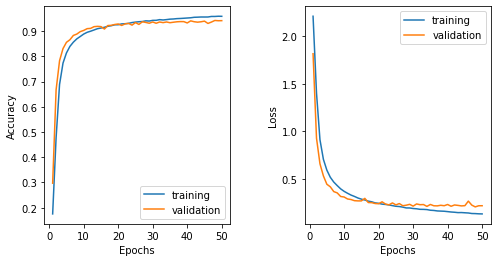

In [3]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.05_0.025.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.05_0.025_ver2_2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1183 - accuracy: 0.2430 - val_loss: 1.3413 - val_accuracy: 0.5261
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9865 - accuracy: 0.6647 - val_loss: 0.4411 - val_accuracy: 0.8634
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4602 - accuracy: 0.8599 - val_loss: 0.2669 - val_accuracy: 0.9173
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3428 - accuracy: 0.8984 - val_loss: 0.2352 - val_accuracy: 0.9263
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2912 - accuracy: 0.9152 - val_loss: 0.2084 - val_accuracy: 0.9339
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.9254 - val_loss: 0.1774 - val_accuracy: 0.9439
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2295 - accuracy: 0.9331 - val_loss: 0.1764 - val_accuracy:

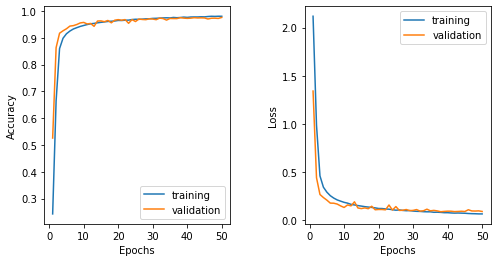

In [4]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.2_0.01.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.2_0.01_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1655 - accuracy: 0.1757 - val_loss: 1.6411 - val_accuracy: 0.3573
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1834 - accuracy: 0.5619 - val_loss: 0.5723 - val_accuracy: 0.8222
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5504 - accuracy: 0.8279 - val_loss: 0.3099 - val_accuracy: 0.9082
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8899 - val_loss: 0.2660 - val_accuracy: 0.9224
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.9110 - val_loss: 0.2369 - val_accuracy: 0.9279
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9231 - val_loss: 0.2058 - val_accuracy: 0.9394
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2419 - accuracy: 0.9316 - val_loss: 0.1798 - val_accuracy:

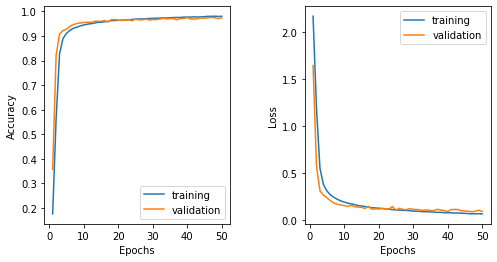

In [5]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.2_0.01.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.2_0.01_ver2_2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2859 - accuracy: 0.1496 - val_loss: 2.2005 - val_accuracy: 0.2871
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7305 - accuracy: 0.3495 - val_loss: 1.2693 - val_accuracy: 0.5260
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1410 - accuracy: 0.5828 - val_loss: 0.9846 - val_accuracy: 0.6332
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9152 - accuracy: 0.6842 - val_loss: 0.7211 - val_accuracy: 0.7535
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7700 - accuracy: 0.7481 - val_loss: 0.5874 - val_accuracy: 0.8178
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6690 - accuracy: 0.7873 - val_loss: 0.5890 - val_accuracy: 0.8140
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5939 - accuracy: 0.8115 - val_loss: 0.5492 - val_accuracy:

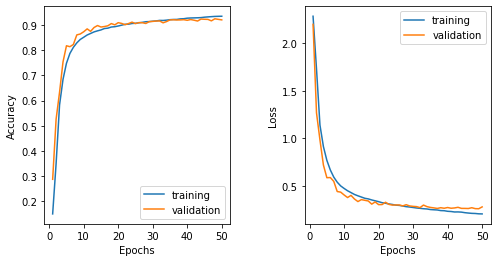

In [6]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.02_0.05.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.02_0.05_ver2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2823 - accuracy: 0.1247 - val_loss: 2.1558 - val_accuracy: 0.2033
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7637 - accuracy: 0.3317 - val_loss: 1.3436 - val_accuracy: 0.4907
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2596 - accuracy: 0.5305 - val_loss: 1.0699 - val_accuracy: 0.6034
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0068 - accuracy: 0.6338 - val_loss: 0.7709 - val_accuracy: 0.7506
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8459 - accuracy: 0.7130 - val_loss: 0.6328 - val_accuracy: 0.7958
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7196 - accuracy: 0.7678 - val_loss: 0.5406 - val_accuracy: 0.8324
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6386 - accuracy: 0.7979 - val_loss: 0.5125 - val_accuracy:

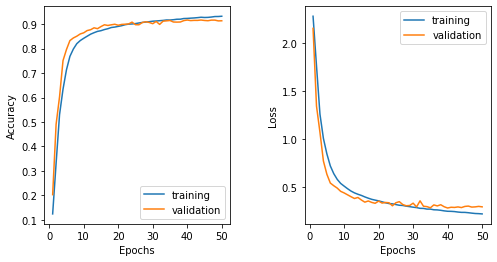

In [7]:
SX=128 #画像サイズ
SY=128 
N=70000 #データ数
epochs=50 #エポック数
depth=6 #勾配消失
resolution=2**8 #simデータを割る数
dataname=r"./simdat/mnist_diff_128_sim_rand_fix_0.02_0.05.dat"  #simデータ
modelsavename=r"./h5model/mnist_diff_128_sim_rand_fix_0.02_0.05_ver2_2.h5" #モデル名
e1=1
e2=epochs+1
DROPOUT=0.1 #過学習
import tensorflow as tf
import keras as ks
from keras.optimizers import RMSprop,Adam,SGD #最適化関数のインポート
OPTIMIZER=SGD() #最適化関数

#シミュレーションデータ読み込み
x=[]
with open(dataname,'rb') as f:
         for i in range(N*SX):
             tmp=f.read(4)
             q=int.from_bytes(tmp,'little')
             x.append(q)
import numpy as np
x=np.array(x)
x=x.reshape(N,SX)
x=x.astype('float32')
x/=(resolution-1)

import os 
os.environ['KERAS_BACKEND']='theano'
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import np_utils
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

mnist=fetch_openml('mnist_784')
y=mnist['target']
y=y.to_numpy()
y=np_utils.to_categorical(y,10)

x_train,x_vali=x[:60000],x[60000:] #60000枚が学習、60001~65000がvalidation、65001~70000がテスト
y_train,y_vali=y[:60000],y[60000:]

#モデル
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(SX,)))

for i in range(depth):
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(DROPOUT))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

#学習
result=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_vali, y_vali))

#学習過程可視化
train_process_acc=[]
train_process_val_acc=[]
train_process_ls=[]
train_process_val_ls=[]
for i in range(e1-1,e2-1):
    train_process_acc.append(result.history['accuracy'][i])
    train_process_val_acc.append(result.history['val_accuracy'][i])
    train_process_ls.append(result.history['loss'][i])
    train_process_val_ls.append(result.history['val_loss'][i])

plt.rcParams["figure.figsize"] = (8,4)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(range(e1, e2), train_process_acc, label="training")
plt.plot(range(e1, e2), train_process_val_acc, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(e1, e2), train_process_ls, label="training")
plt.plot(range(e1, e2), train_process_val_ls, label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#再度評価
loss_and_metrics=model.evaluate(x_vali,y_vali,batch_size=128)
print(loss_and_metrics)

#保存
model.save(modelsavename)

plt.show()